# **Human Activity Recognition with Smart Phones**:



**Dataset**:

The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. 
For each record in the dataset the following is provided:

1. Triaxial acceleration from the accelerometer (total acceleration) and   the estimated body acceleration.

2. Triaxial Angular velocity from the gyroscope.

3. A 561-feature vector with time and frequency domain variables.

4. Its activity label.

5. An identifier of the subject who carried out the experiment.

**Target:**

The objective is to classify activities into one of the six activities performed.

**Approach**:

Applied Dimensionality Reduction and Trained model using Convolutional Neural Network.  

# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Importing Dataset**

In [ ]:
train=pd.read_csv("/content/drive/My Drive/ML Projects datasets/Human Activity Recognition/train.csv")
test=pd.read_csv("/content/drive/My Drive/ML Projects datasets/Human Activity Recognition/test.csv")

In [ ]:
train.shape

(7352, 563)

In [ ]:
test.shape

(2947, 563)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [ ]:
print(train)

      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  ...  subject          Activity
0              0.288585          -0.020294  ...        1          STANDING
1              0.278419          -0.016411  ...        1          STANDING
2              0.279653          -0.019467  ...        1          STANDING
3              0.279174          -0.026201  ...        1          STANDING
4              0.276629          -0.016570  ...        1          STANDING
...                 ...                ...  ...      ...               ...
7347           0.299665          -0.057193  ...       30  WALKING_UPSTAIRS
7348           0.273853          -0.007749  ...       30  WALKING_UPSTAIRS
7349           0.273387          -0.017011  ...       30  WALKING_UPSTAIRS
7350           0.289654          -0.018843  ...       30  WALKING_UPSTAIRS
7351           0.351503          -0.012423  ...       30  WALKING_UPSTAIRS

[7352 rows x 563 columns]


# **Checking for Null values**

In [ ]:
train.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [ ]:
train.isnull().values.any()

False

# **Splitting Data into X and y**

In [ ]:
X_train=train.iloc[:,:-2]
y_train=train.iloc[:,-1]

X_test=test.iloc[:,:-2]
y_test=test.iloc[:,-1]

In [ ]:
print(y_train)

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
7347    WALKING_UPSTAIRS
7348    WALKING_UPSTAIRS
7349    WALKING_UPSTAIRS
7350    WALKING_UPSTAIRS
7351    WALKING_UPSTAIRS
Name: Activity, Length: 7352, dtype: object


# **EDA**

# **Plotting Categorized Pie Chart**

In [ ]:
Category_count=np.array(y_train.value_counts())
activity=sorted(y_train.unique())

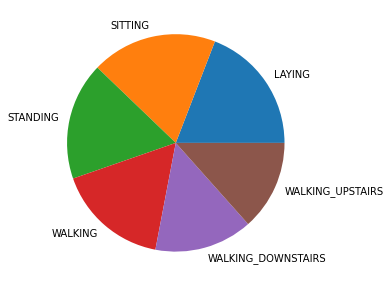

In [ ]:
plt.figure(figsize=(15,5))
plt.pie(Category_count,labels=activity);

**Distribution of sensors data used to classify activities**

In [ ]:
acc=0
gyro=0
others=0
for column in train.columns:
  if "Acc" in str(column):
    acc+=1
  elif "Gyro" in str(column):
    gyro+=1 
  else:
    others+=1
       

<BarContainer object of 3 artists>

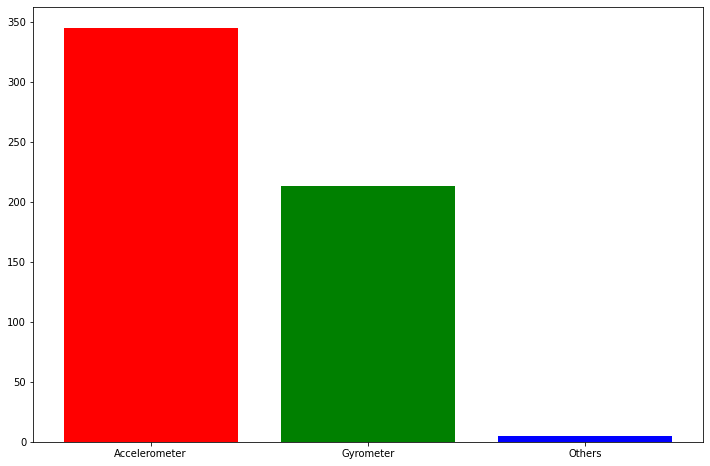

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(['Accelerometer','Gyrometer','Others'],[acc,gyro,others],color=['r','g','b'])

# **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


# **Label Encoding**

In [ ]:
print(y_train)

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
7347    WALKING_UPSTAIRS
7348    WALKING_UPSTAIRS
7349    WALKING_UPSTAIRS
7350    WALKING_UPSTAIRS
7351    WALKING_UPSTAIRS
Name: Activity, Length: 7352, dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_train=pd.get_dummies(y_train).values

In [ ]:
print(y_train)

[[0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 ...
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]]


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y_test=encoder.fit_transform(y_test)
y_test=pd.get_dummies(y_test).values

# **Dimensionality Reduction**

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
explained_variance=pca.explained_variance_ratio_

In [ ]:
explained_variance

array([5.07811723e-01, 6.58068027e-02, 2.80643677e-02, 2.50395275e-02,
       1.88828501e-02, 1.72400642e-02, 1.37101147e-02, 1.19907768e-02,
       9.95859511e-03, 9.65086590e-03, 8.60051649e-03, 8.00280950e-03,
       7.63996369e-03, 6.45328924e-03, 6.32324346e-03, 5.99722090e-03,
       5.86750302e-03, 5.75407392e-03, 5.67921047e-03, 5.27295779e-03,
       5.00362925e-03, 4.88408406e-03, 4.78205784e-03, 4.68562930e-03,
       4.49289260e-03, 4.21027243e-03, 4.17978682e-03, 4.05570369e-03,
       3.88524168e-03, 3.87018044e-03, 3.65958878e-03, 3.54553381e-03,
       3.47942606e-03, 3.37187109e-03, 3.29676999e-03, 3.28215050e-03,
       3.20529478e-03, 2.95614939e-03, 2.86722415e-03, 2.85074548e-03,
       2.68766324e-03, 2.65619859e-03, 2.63405989e-03, 2.58850596e-03,
       2.49054872e-03, 2.46954034e-03, 2.40679913e-03, 2.36115075e-03,
       2.30278857e-03, 2.27567245e-03, 2.20164699e-03, 2.13466984e-03,
       2.07704456e-03, 2.02496620e-03, 1.99779441e-03, 1.97750625e-03,
      

In [ ]:
print(X_train)

[[-1.61385437e+01  2.15202401e+00  3.14478025e+00 ... -2.22286869e-15
  -1.51050109e-16  6.47538499e-17]
 [-1.52961943e+01  1.38714378e+00 -6.82221071e-01 ...  2.48612485e-15
  -3.18052555e-16 -3.64024836e-17]
 [-1.51370186e+01  2.47335094e+00 -1.75664057e+00 ...  2.12538114e-15
  -2.86861012e-16  5.43437906e-17]
 ...
 [ 1.43334359e+01 -1.22607119e+01  4.02594620e+00 ...  1.68640744e-15
   1.67476428e-18 -2.95413699e-17]
 [ 1.28760189e+01 -1.40712559e+01  2.91606098e+00 ...  1.38235658e-15
   8.20636471e-17 -5.78949584e-18]
 [ 1.30161037e+01 -1.22442612e+01  1.33604965e+00 ...  1.13641911e-15
  -1.07900054e-16 -3.34315683e-17]]


# **Modeling**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

**Using Artificial Neural Network**

In [ ]:
model=Sequential()

model.add(Dense(units=64,kernel_initializer='uniform',activation='relu',input_dim=X_train.shape[1]))

model.add(Dense(units=128,kernel_initializer='uniform',activation='relu'))

model.add(Dense(units=64,kernel_initializer='uniform',activation='relu'))

model.add(Dense(units=6,kernel_initializer='uniform',activation='softmax'))


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, y_train, batch_size=256, epochs=22, validation_data=(X_test, y_test))

Epoch 1/22
29/29 [==============================] - 0s 8ms/step - loss: 1.5685 - accuracy: 0.3648 - val_loss: 1.0866 - val_accuracy: 0.3750
Epoch 2/22
29/29 [==============================] - 0s 4ms/step - loss: 0.6892 - accuracy: 0.7263 - val_loss: 0.3827 - val_accuracy: 0.8147
Epoch 3/22
29/29 [==============================] - 0s 5ms/step - loss: 0.2531 - accuracy: 0.8811 - val_loss: 0.2128 - val_accuracy: 0.9121
Epoch 4/22
29/29 [==============================] - 0s 4ms/step - loss: 0.0862 - accuracy: 0.9705 - val_loss: 0.1649 - val_accuracy: 0.9403
Epoch 5/22
29/29 [==============================] - 0s 5ms/step - loss: 0.0389 - accuracy: 0.9863 - val_loss: 0.1602 - val_accuracy: 0.9447
Epoch 6/22
29/29 [==============================] - 0s 4ms/step - loss: 0.0271 - accuracy: 0.9909 - val_loss: 0.1572 - val_accuracy: 0.9484
Epoch 7/22
29/29 [==============================] - 0s 4ms/step - loss: 0.0207 - accuracy: 0.9937 - val_loss: 0.1784 - val_accuracy: 0.9471
Epoch 8/22
29/29 [==

# **Analysing Accuracy**

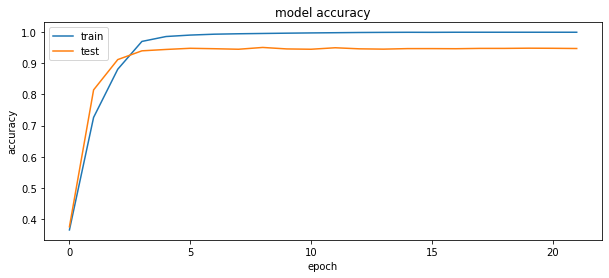

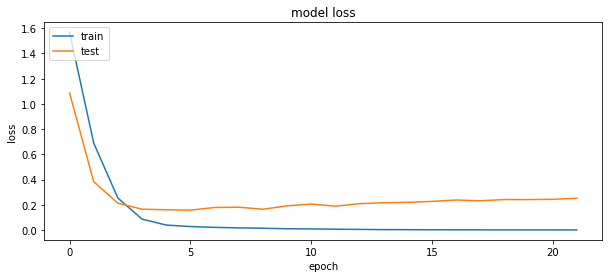

In [ ]:
from pylab import rcParams
rcParams['figure.figsize']=10,4
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()



# **Prediction**

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
print(y_pred)

[[2.6584654e-10 4.4046651e-06 9.9999559e-01 2.0603958e-11 1.7866259e-16
  6.0841353e-11]
 [3.6108400e-08 6.7180069e-04 9.9932814e-01 3.4191339e-10 1.7573246e-15
  1.1020097e-10]
 [3.1387235e-06 7.2447523e-02 9.2754936e-01 2.2504789e-08 2.1256961e-13
  1.1148559e-09]
 ...
 [2.8471652e-06 7.5495414e-09 5.1443177e-08 6.8821578e-06 1.7592351e-05
  9.9997258e-01]
 [1.6247057e-05 1.6255424e-07 4.2928423e-07 7.4462841e-05 9.0336136e-05
  9.9981838e-01]
 [4.2229069e-05 3.2352639e-06 6.7663230e-08 4.6344502e-03 1.0776724e-03
  9.9424237e-01]]


In [ ]:
y_test_class=np.argmax(y_test,axis=1)
y_pred_class=np.argmax(y_pred,axis=1)

In [ ]:
y_test_class

array([2, 2, 2, ..., 5, 5, 5])

In [ ]:
y_pred_class

array([2, 2, 2, ..., 5, 5, 5])

# **Accuracy**

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score 
cm=confusion_matrix(y_test_class,y_pred_class)
accuracy=accuracy_score(y_test_class, y_pred_class)

In [ ]:
cm

array([[516,   0,  21,   0,   0,   0],
       [  0, 432,  58,   0,   0,   1],
       [  0,  17, 515,   0,   0,   0],
       [  0,   0,   0, 495,   0,   1],
       [  0,   0,   0,   6, 404,  10],
       [  0,   0,   0,  29,  11, 431]])

In [ ]:
accuracy

0.9477434679334917

We have reached 94% accuracy using ANN 